In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform as sp_uniform, randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
data = pd.read_csv('data/strongdrink.txt')
data.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


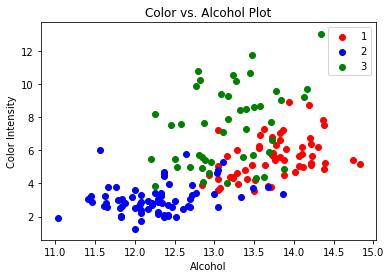

In [3]:
# Solution 1.a.
colors = {1:'red', 2:'blue', 3:'green'}
for i in range(1,4):
    df = data[data['cultivar'] == i]
    plt.scatter(df['alco'], df['color_int'], c=colors[i], label=i)

plt.xlabel("Alcohol") 
plt.ylabel("Color Intensity")
plt.title("Color vs. Alcohol Plot")
plt.legend()
plt.show()

In [4]:

# Solution 1.b.
Xvars = ['alco', 'malic', 'tot_phen', 'color_int']
X = data[Xvars]
y = data['cultivar']

LogReg = LogisticRegression()
param_dist1 = {'penalty': ['l1', 'l2'],
               'C': sp_uniform(0.1, 10.0)}
random_search1 = RandomizedSearchCV(LogReg, param_distributions=param_dist1, n_iter=200,
                                    n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
random_search1.fit(X, y)

print('Best tuning parameters = ', random_search1.best_params_)
print('MSE of optimal results =', -random_search1.best_score_)

Best tuning parameters =  {'C': 2.665871587495725, 'penalty': 'l1'}
MSE of optimal results = 0.11931818181818182


/Users/luyongfei/Desktop/python/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/luyongfei/Desktop/python/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/luyongfei/Desktop/python/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/luyongfei/Desktop/python/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of it

In [5]:
# Solution 1.c.
forest = RandomForestClassifier(bootstrap=True, oob_score=True)

param_dist2 = { 'n_estimators': sp_randint(10, 200),
                'max_depth': sp_randint(2, 4),
                'min_samples_split': sp_randint(2, 20),
                'min_samples_leaf': sp_randint(2, 20),
                'max_features': sp_randint(1, 4)}

random_search2 = RandomizedSearchCV(forest, param_distributions=param_dist2, n_iter=200,
                                    n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
random_search2.fit(X, y)
print('Best tuning parameters = ', random_search2.best_params_)
print('MSE of optimal results =', -random_search2.best_score_)

Best tuning parameters =  {'max_depth': 2, 'max_features': 2, 'min_samples_leaf': 19, 'min_samples_split': 4, 'n_estimators': 22}
MSE of optimal results = 0.125


/Users/luyongfei/Desktop/python/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [8]:

# Solution 1.d.
svc_model = SVC(kernel='rbf')

param_dist3 = { 'C': sp_uniform(loc=0.1, scale=10.0),
                'gamma': ['scale', 'auto'],
                'shrinking': [True, False]}
random_search3 = RandomizedSearchCV(svc_model, param_distributions=param_dist3, n_iter=200,
                                    n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
random_search3.fit(X, y)
print('Best tuning parameters = ', random_search3.best_params_)
print('MSE of optimal results =', -random_search3.best_score_)

Best tuning parameters =  {'C': 9.58835943424229, 'gamma': 'scale', 'shrinking': True}
MSE of optimal results = 0.13636363636363635


/Users/luyongfei/Desktop/python/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [7]:
# Solution 1.e.
nn = MLPClassifier()

param_dist4 = {'hidden_layer_sizes': sp_randint(1, 100),
                'activation': ['logistic', 'relu'],
                'alpha': sp_uniform(0.1, 10.0)}

random_search4 = RandomizedSearchCV(nn, param_distributions=param_dist4, n_iter=200,
                                    n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
random_search4.fit(X, y)
print('Best tuning parameters = ', random_search4.best_params_)
print('MSE of optimal results =', -random_search4.best_score_)

Best tuning parameters =  {'activation': 'relu', 'alpha': 1.6599670753042983, 'hidden_layer_sizes': 89}
MSE of optimal results = 0.22727272727272727


/Users/luyongfei/Desktop/python/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/luyongfei/Desktop/python/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
